ejercicio 1

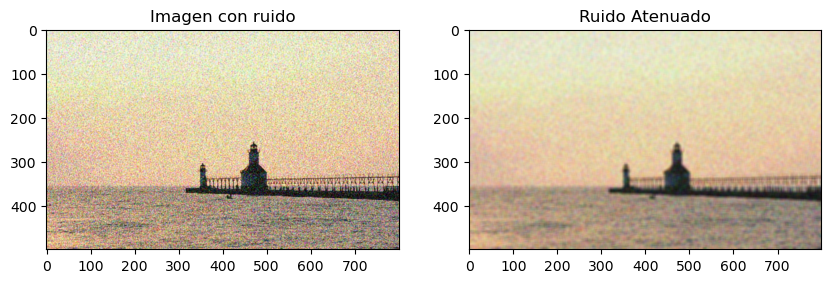

In [9]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

imgRuido=cv2.imread('imgParcial/ruido.jpg')
imgRuido=cv2.cvtColor(imgRuido,cv2.COLOR_BGR2RGB)
kernel=np.ones((8,8),np.float32)/64
suavizado=cv2.filter2D(imgRuido,-1,kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121)

plt.imshow(imgRuido)
plt.title('Imagen con ruido')

plt.subplot(122)
plt.imshow(suavizado)
plt.title('Ruido Atenuado')

plt.show()


ejercicio 2

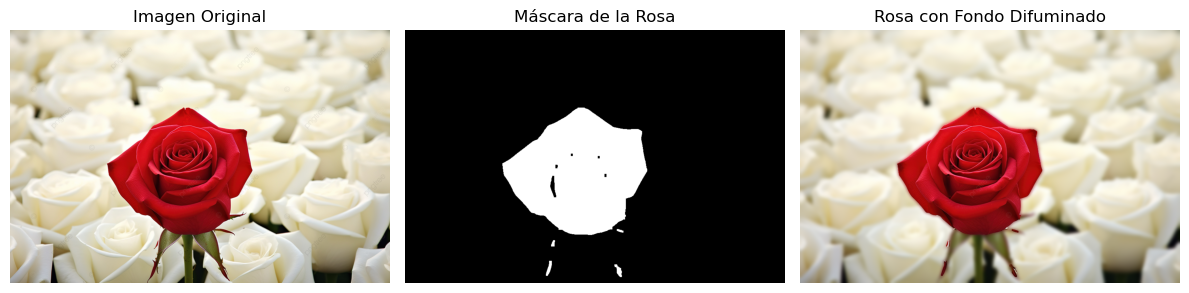

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectRosa(dirImg):
    img = cv2.imread(dirImg)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    r1 = np.array([0, 70, 50])
    r2 = np.array([10, 255, 255])
    r3 = np.array([160, 70, 50])
    r4 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, r1, r2)
    mask2 = cv2.inRange(hsv, r3, r4)
    maskJunt = mask1 | mask2
    kernel = np.ones((5,5), np.uint8)
    maskJunt = cv2.morphologyEx(maskJunt, cv2.MORPH_CLOSE, kernel)
    maskJunt = cv2.morphologyEx(maskJunt, cv2.MORPH_OPEN, kernel)
    fondoMask = cv2.bitwise_not(maskJunt)
    blurMask = cv2.GaussianBlur(img_rgb, (25, 25), 0)
    rosa = cv2.bitwise_and(img_rgb, img_rgb, mask=maskJunt)
    background = cv2.bitwise_and(blurMask, blurMask, mask=fondoMask)
    imgComb = cv2.add(rosa, background)
    plt.figure(figsize=(12, 8))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(maskJunt, cmap='gray')
    plt.title('Máscara de la Rosa')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(imgComb)
    plt.title('Rosa con Fondo Difuminado')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

detectRosa('imgParcial/rosa.png')

Ejercicio 3 

Objetos detectados:
Rojo: 10
Verde: 9


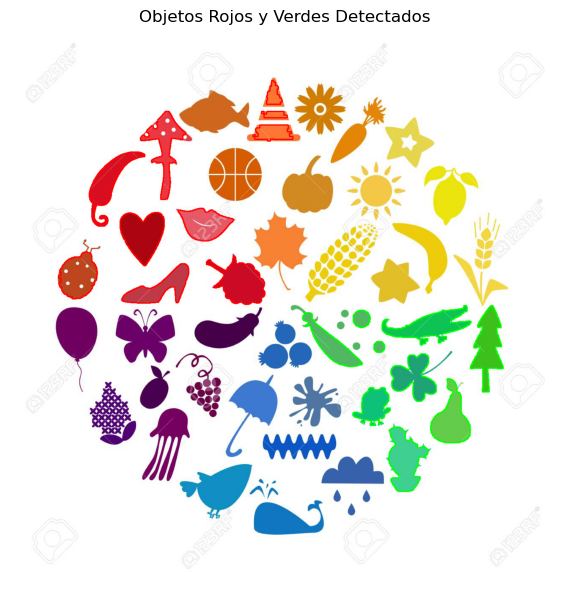

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectar_rojo_verde(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    color_ranges = {
        'rojo': ([0, 100, 100], [10, 255, 255], [160, 100, 100], [179, 255, 255]),  
        'verde': ([35, 100, 100], [85, 255, 255]) 
    }

    resultados = {}
    contornos_coloreados = img.copy()

    for color, rangos in color_ranges.items():
        if color == 'rojo':
            lower1, upper1, lower2, upper2 = rangos
            mask1 = cv2.inRange(img_hsv, np.array(lower1), np.array(upper1))
            mask2 = cv2.inRange(img_hsv, np.array(lower2), np.array(upper2))
            mask = cv2.bitwise_or(mask1, mask2)
        else:
            lower, upper = rangos
            mask = cv2.inRange(img_hsv, np.array(lower), np.array(upper))

        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contornos_validos = [cnt for cnt in contornos if cv2.contourArea(cnt) > 500]

        resultados[color] = len(contornos_validos)

        color_bgr = (0, 255, 0) if color == 'verde' else (0, 0, 255)
        cv2.drawContours(contornos_coloreados, contornos_validos, -1, color_bgr, 2)

    return resultados, contornos_coloreados

imagen = cv2.imread("imgParcial/elementos.jpg")
conteo, imagen_con_contornos = detectar_rojo_verde(imagen)

print("Objetos detectados:")
for color, cantidad in conteo.items():
    print(f"{color.capitalize()}: {cantidad}")

plt.figure(figsize=(10, 6))
plt.title("Objetos Rojos y Verdes Detectados")
plt.imshow(cv2.cvtColor(imagen_con_contornos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()


ejercicio 4

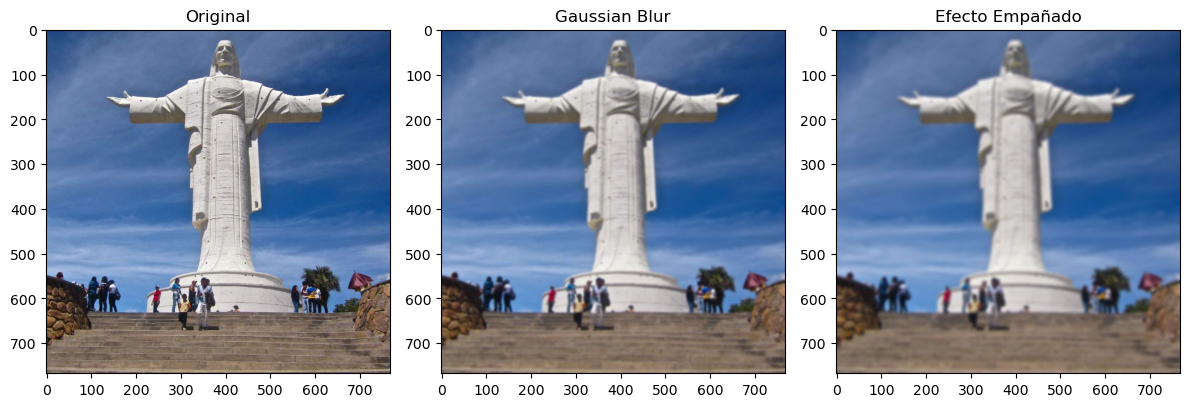

In [22]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def convolucionMedia(imagen, tamkernel):
    kernel = np.ones((tamkernel, tamkernel), np.float32) / (tamkernel * tamkernel)
    return cv2.filter2D(imagen, -1, kernel)

imagen = cv2.imread('imgParcial/cristo.jpg')  
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

gauss_blur = cv2.GaussianBlur(rgb, (11, 11), 0)

empañado = convolucionMedia(gauss_blur, 8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(rgb)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(gauss_blur)
plt.title('Gaussian Blur')

plt.subplot(1, 3, 3)
plt.imshow(empañado)
plt.title('Efecto Empañado')

plt.tight_layout()
plt.show()


Ejercicio 5

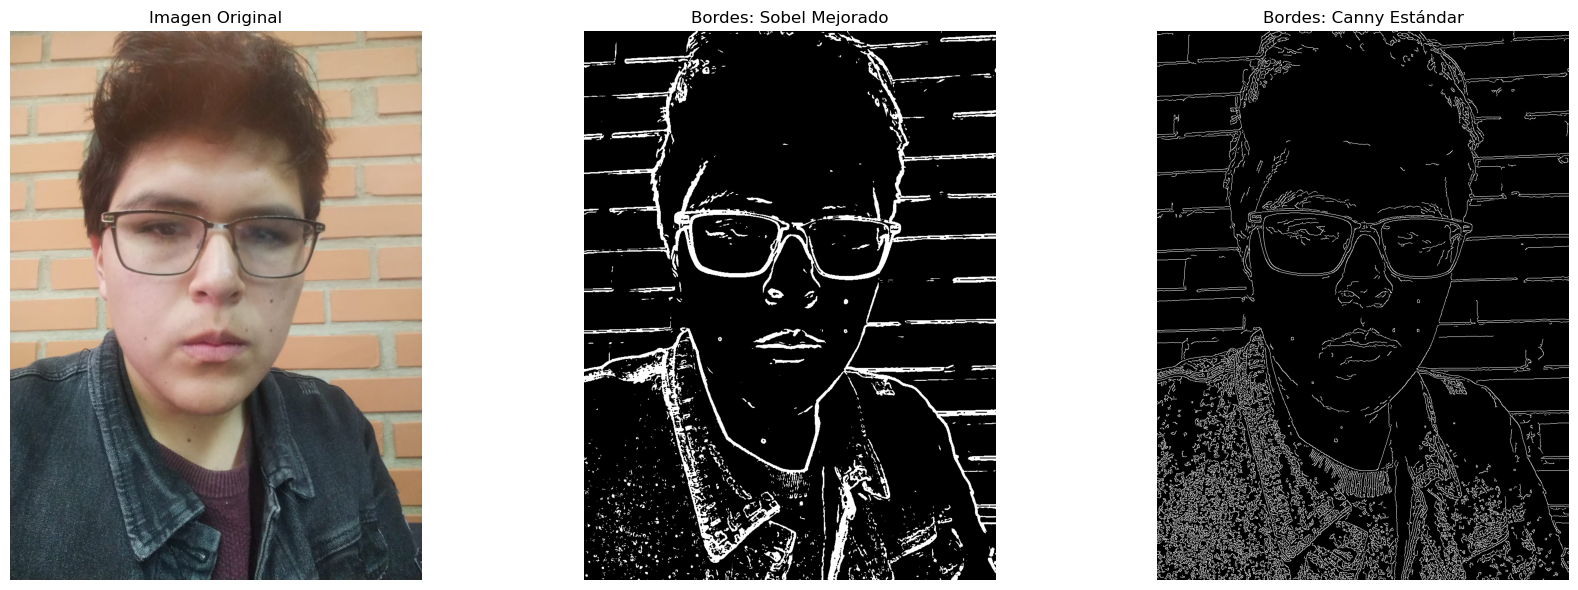

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejorado(img, tam_kernel=5, umbral=50):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (5, 5), 0)
    sobel_x = cv2.Sobel(suavizado, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobel_y = cv2.Sobel(suavizado, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255,
                             cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    
    return bordes
def canny_standard(img, low=25, high=50):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    return cv2.Canny(blurred, low, high)

img = cv2.imread('imgParcial/photo.jpg')
sobel_edges = sobel_mejorado(img)
canny_edges = canny_standard(img)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Bordes: Sobel Mejorado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Bordes: Canny Estándar')
plt.axis('off')

plt.tight_layout()
plt.show()


Ejercicio 6

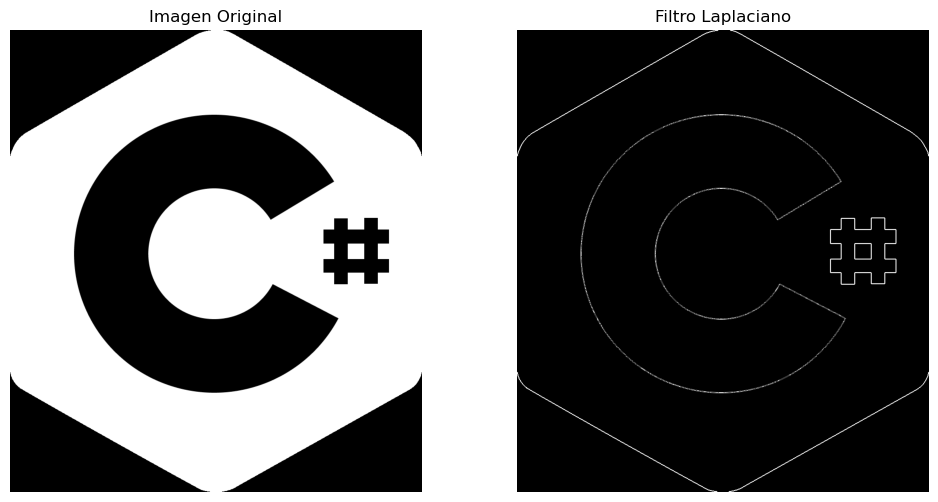

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('imgParcial/lap.png', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_abs = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray')
plt.title('Filtro Laplaciano'), plt.axis('off')

plt.show()

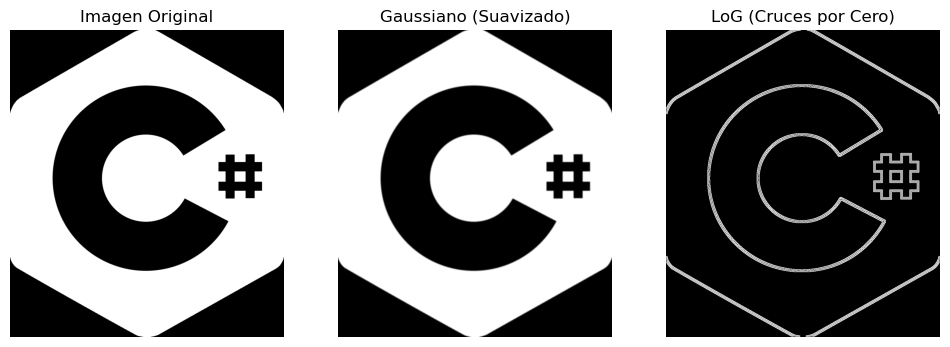

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('imgParcial/lap.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

zero_crossings = np.zeros_like(laplacian)
rows, cols = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
       
        neighbors = [
            laplacian[i-1, j], laplacian[i+1, j],  
            laplacian[i, j-1], laplacian[i, j+1], 
            laplacian[i-1, j-1], laplacian[i-1, j+1],  
            laplacian[i+1, j-1], laplacian[i+1, j+1]
        ]
        if any(np.sign(laplacian[i, j]) != np.sign(n) for n in neighbors):
            zero_crossings[i, j] = 255

plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(blurred, cmap='gray')
plt.title('Gaussiano (Suavizado)'), plt.axis('off')

plt.subplot(133), plt.imshow(zero_crossings, cmap='gray')
plt.title('LoG (Cruces por Cero)'), plt.axis('off')

plt.show()